In [1]:
import compiler_gym
from compiler_gym import wrappers
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import numpy as np
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [21]:
compiler_gym.envs.llvm.datasets.CBenchDataset

<function compiler_gym.datasets.dataset.Dataset.random_benchmark(self, random_state: Optional[numpy.random._generator.Generator] = None) -> compiler_gym.datasets.benchmark.Benchmark>

In [3]:
env = compiler_gym.make( "llvm-v0", benchmark="benchmark://cbench-v1/bzip2", observation_space="Runtime")

In [4]:
env.benchmark

benchmark://cbench-v1/bzip2

In [422]:
observation = env.reset()
observation

array([0.373903])

In [423]:
scores = []
for _ in range(1000): 
    observation, reward, done, info = env.step(env.action_space.sample()) # User selects action 
    scores.append(reward)
    if done:    
        env.reset()

KeyboardInterrupt: 

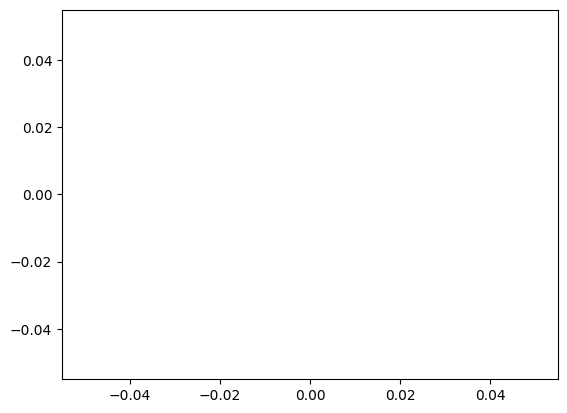

In [424]:
plt.plot(scores)

In [28]:
env.write_bitcode("output.bc")

PosixPath('output.bc')

In [13]:
env.reset(benchmark="benchmark://npb-v0/50")
episode_reward = 0
for i in range(1, 101):
    observation, reward, done, info = env.step(env.action_space.sample())
    if done:
        break
    episode_reward += reward
    print(f"Step {i}, quality={episode_reward:.3%}")


Step 1, quality=0.000%
Step 2, quality=0.000%
Step 3, quality=0.000%
Step 4, quality=0.000%
Step 5, quality=0.000%
Step 6, quality=45200.000%
Step 7, quality=45200.000%
Step 8, quality=45200.000%
Step 9, quality=45200.000%
Step 10, quality=45200.000%
Step 11, quality=45200.000%
Step 12, quality=45200.000%
Step 13, quality=45200.000%
Step 14, quality=195900.000%
Step 15, quality=195900.000%
Step 16, quality=195900.000%
Step 17, quality=195900.000%
Step 18, quality=195900.000%
Step 19, quality=195900.000%
Step 20, quality=195900.000%
Step 21, quality=195900.000%
Step 22, quality=195900.000%
Step 23, quality=196400.000%
Step 24, quality=196400.000%
Step 25, quality=196400.000%
Step 26, quality=196400.000%
Step 27, quality=196400.000%
Step 28, quality=196300.000%
Step 29, quality=196300.000%
Step 30, quality=196300.000%
Step 31, quality=196300.000%
Step 32, quality=196300.000%
Step 33, quality=196300.000%
Step 34, quality=196300.000%
Step 35, quality=196300.000%
Step 36, quality=196300.000

In [14]:
env.commandline()

'opt -functionattrs -loop-reroll -sink -die -loop-fusion -sroa -elim-avail-extern -elim-avail-extern -deadargelim -ipsccp -separate-const-offset-from-gep -lower-constant-intrinsics -simple-loop-unswitch -newgvn -lower-constant-intrinsics -prune-eh -canonicalize-aliases -loop-simplify -inferattrs -inject-tli-mappings -partially-inline-libcalls -memcpyopt -newgvn -rpo-functionattrs -loweratomic -speculative-execution -redundant-dbg-inst-elim -loop-vectorize -irce -forceattrs -hotcoldsplit -dse -scalarizer -loweratomic -lower-constant-intrinsics -canonicalize-aliases -strip-dead-prototypes -nary-reassociate -lower-expect -consthoist -slp-vectorizer -coro-elide -slsr -sink -ee-instrument -strip -sroa -float2int -instnamer -loop-fusion -rpo-functionattrs -instnamer -consthoist -add-discriminators -deadargelim -mldst-motion -licm -memcpyopt -loop-reduce -coro-cleanup -ipsccp -instnamer -loop-unswitch -mldst-motion -coro-split -loop-fusion -globalsplit -loop-unroll -instcombine -memcpyopt -me

In [17]:
compiler_gym.bin.service --ls_env

AttributeError: module 'compiler_gym' has no attribute 'bin'

# DQN Scraps

In [1210]:
env = compiler_gym.make(
    "llvm-autophase-ic-v0",
    benchmark="benchmark://cbench-v1/dijkstra",
    observation_space="Autophase",
)
env = wrappers.TimeLimit(env, 45)

In [74]:
class Qnet(nn.Module):
    def __init__(self, n_input_channels, n_actions):
        super(Qnet, self).__init__()
        self.fc1 = nn.Linear(n_input_channels, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, n_actions)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def sample_action(self, obs, epsilon):
        obs = torch.tensor(obs).unsqueeze(0).to("cpu").to(dtype=torch.float32)
        out = self.forward(obs)
        coin = random.random()
        if coin < epsilon:
            return random.randint(0, 123)
        else:
            return out.argmax().item()

In [75]:
model = Qnet(56, 124)

In [1252]:
for i in range(124):
    ob = env.reset()
    ob, r, done, info = env.step(i)
    print(r)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.030612244897959183
0.05102040816326531
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.061224489795918366
0.0
0.45408163265306123
0.22448979591836735
0.0
0.0
0.0
0.0
0.0
-0.27040816326530615
0.0
0.04081632653061224
0.4387755102040816
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1326530612244898
0.0
0.04591836734693878
0.0
-0.00510204081632653
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.16326530612244897
0.030612244897959183
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.45408163265306123
0.0
-0.29081632653061223
0.0
0.0
0.0
0.6581632653061225
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.6581632653061225
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.00510204081632653


In [93]:
a = model.sample_action(ob, 0.0)
env.step(a)

(array([  0,   0,  36,  26,   6,  30,  15,   3,   8,  18,   0,   0,   0,
         57,   0,  48,  18,   6,  66, 105,  26,  41,  48,  30,  20,   0,
         20,  23,   0,   8,  49,  26,  48,  55,  36,  18,   0, 132,   8,
          0,   0,   6,  16,   0,   0,  57,   0,   0,   0,   0,  57, 450,
        303,  17,   0, 197]),
 None,
 False,
 {'action_had_no_effect': True, 'new_action_space': False})

In [42]:
model(ob).shape

torch.Size([1, 56])


torch.Size([1, 128])

In [523]:
env.action_space.n

124

## Analysis

<Axes: xlabel='episode', ylabel='score'>

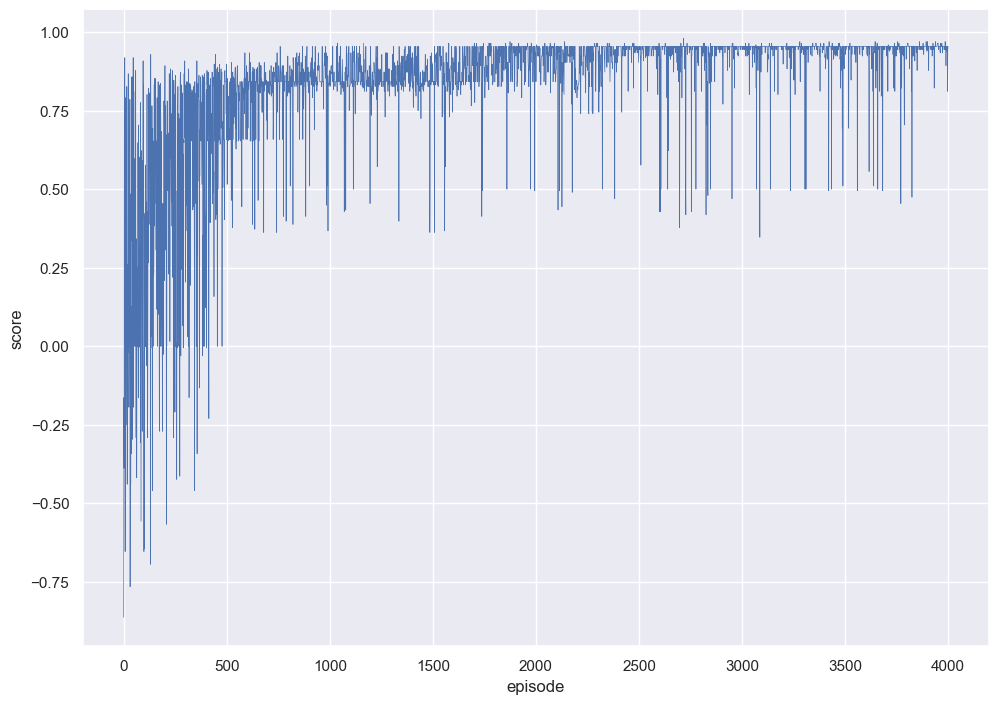

In [641]:
df = pd.read_csv('data/llvm-autophase/Uniform-DDQN2.csv')
sns.lineplot(data=df,x='episode',y='score',linewidth=.5)
# sns.lineplot(data=df,x='episode',y='Q-value')

<Axes: xlabel='index', ylabel='lens'>

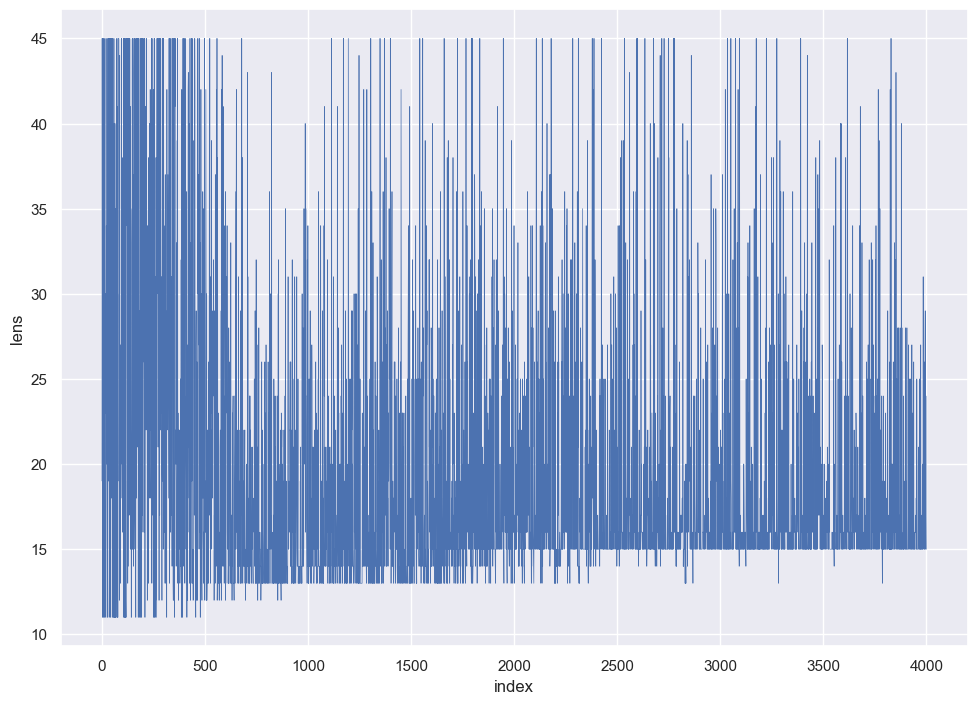

In [643]:
seqs = pd.DataFrame(df['action-sequence']).reset_index()
seqs['action-sequence'] = [eval(x) for x in df['action-sequence']]
lens = [len(x) for x in seqs['action-sequence']]
action_map = {}
for i in range(124):
    action_map[i] = env.action_space.to_string(i)

actions = []
for indx, (i, s) in seqs.iterrows():
    seq_actions = []
    for a in s:
        astring = action_map[a]
        seq_actions.append(astring)
    actions.append(seq_actions)

seqs['lens'] = lens
seqs['actions'] = actions
sns.lineplot(data=seqs, x="index",y='lens',linewidth=.5)

In [649]:
seqs

,index,action-sequence,lens,actions
0,0,"[121, 11, 106, 103, 39, 27, 74, 55, 102, 65, 6...",45,"[-strip, -callsite-splitting, -redundant-dbg-i..."
1,1,"[38, 90, 71, 83, 52, 26, 46, 79, 100, 92, 104,...",19,"[-gvn-hoist, -memcpyopt, -loop-rotate, -lower-..."
2,2,"[54, 97, 46, 31, 10, 8, 93, 47, 104, 94, 88, 7...",30,"[-instnamer, -newgvn, -ipsccp, -elim-avail-ext..."
3,3,"[111, 33, 53, 89, 17, 32, 20, 58, 65, 90, 31, ...",45,"[-sroa, -flattencfg, -instcombine, -lower-wide..."
4,4,"[52, 59, 75, 0, 47, 92, 96, 14, 50, 17, 50]",11,"[-instsimplify, -load-store-vectorizer, -loop-..."
...,...,...,...,...
3995,3995,"[111, 29, 10, 53, 113, 113, 43, 113, 113, 113,...",15,"[-sroa, -early-cse-memssa, -simplifycfg, -inst..."
3996,3996,"[69, 111, 29, 53, 10, 113, 113, 113, 113, 113,...",16,"[-loop-predication, -sroa, -early-cse-memssa, ..."
3997,3997,"[111, 97, 10, 53, 113, 113, 113, 113, 113, 113...",24,"[-sroa, -newgvn, -simplifycfg, -instcombine, -..."
3998,3998,"[111, 97, 10, 53, 77, 10, 83, 83, 83, 83, 83, ...",17,"[-sroa, -newgvn, -simplifycfg, -instcombine, -..."


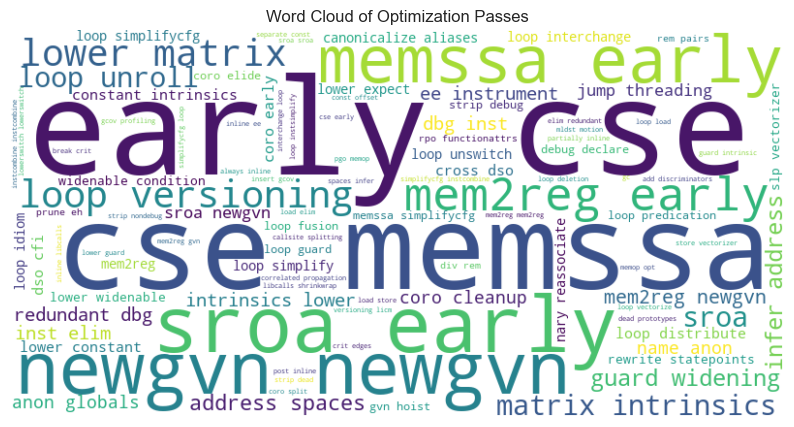

In [295]:
from wordcloud import WordCloud

# Flatten the list of passes
passes_list = [pass_ for passes in seqs['actions'] for pass_ in passes]

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(''.join(passes_list))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Optimization Passes')
plt.show()

<Axes: xlabel='lens', ylabel='Count'>

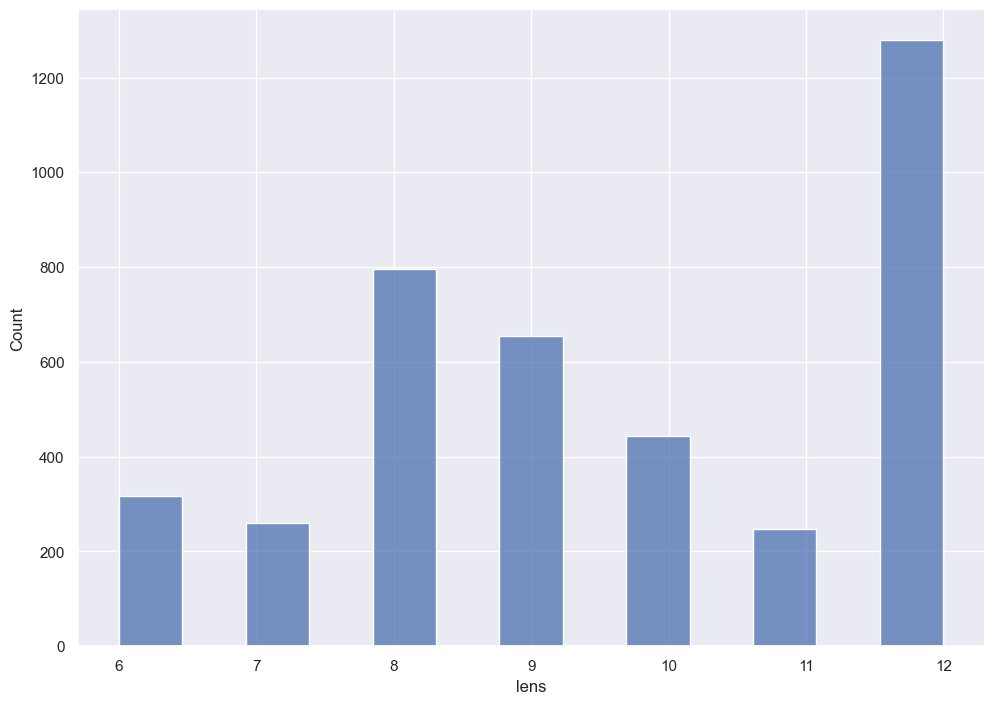

In [221]:
sns.histplot(data=seqs,x='lens')

In [229]:
env.action_space.to_string(0)

'-add-discriminators'

In [222]:
seqs

,index,action-sequence,lens
0,0,"[121, 11, 106, 103, 39, 27, 74, 55, 102, 65, 6...",12
1,1,"[4, 46, 40, 54, 67, 22]",6
2,2,"[3, 22, 65, 65, 23, 57, 94, 116, 101, 46, 123,...",12
3,3,"[91, 83, 62, 63, 106, 84]",6
4,4,"[115, 44, 117, 58, 28, 104]",6
...,...,...,...
3995,3995,"[103, 29, 10, 39, 47, 82, 25, 10, 47, 18, 18, 18]",12
3996,3996,"[103, 39, 18, 18, 18, 18, 18, 18]",8
3997,3997,"[95, 103, 97, 10, 39, 18, 18, 18, 18, 53, 21, 21]",12
3998,3998,"[103, 97, 93, 93, 93, 93, 93, 93]",8


## SHA

<Axes: xlabel='episode', ylabel='score'>

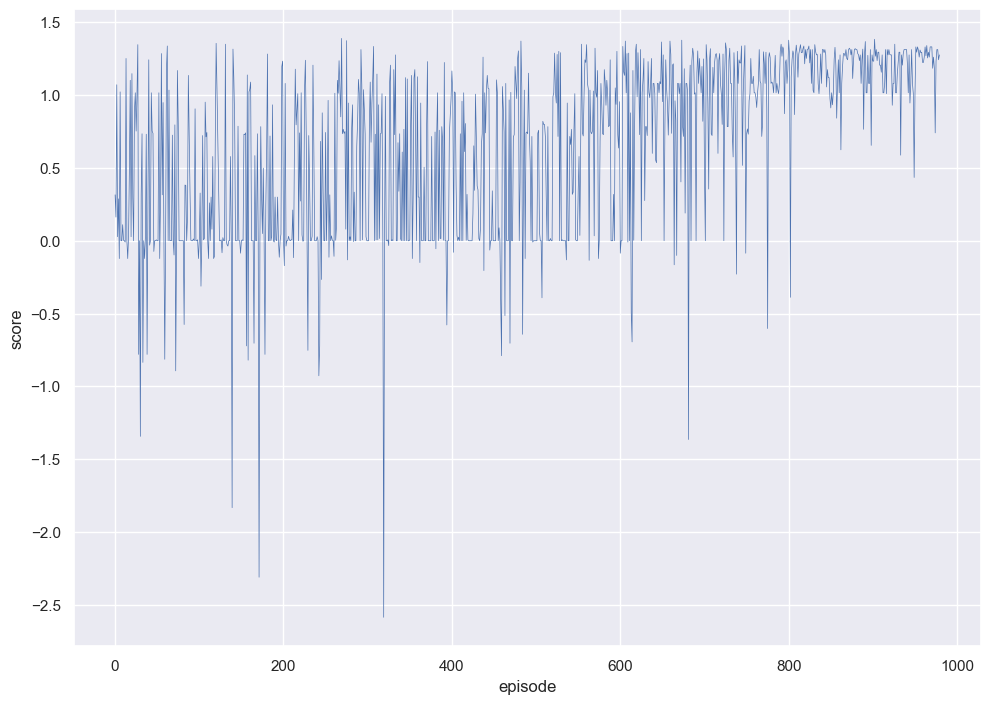

In [770]:
df = pd.read_csv('data/llvm-autophase/Uniform-DDQN-sha47.csv')
sns.lineplot(data=df,x='episode',y='score',linewidth=.5)
# sns.lineplot(data=df,x='episode',y='Q-value')

<Axes: xlabel='index', ylabel='lens'>

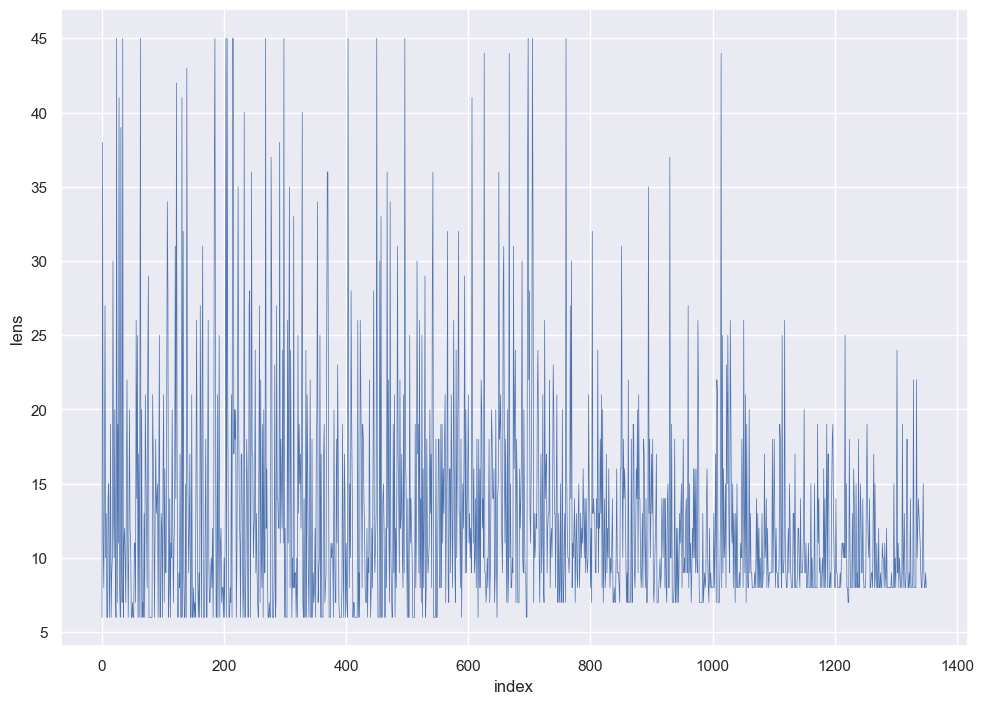

In [674]:
seqs = pd.DataFrame(df['action-sequence']).reset_index()
seqs['action-sequence'] = [eval(x) for x in df['action-sequence']]
lens = [len(x) for x in seqs['action-sequence']]
action_map = {}
for i in range(124):
    action_map[i] = env.action_space.to_string(i)

actions = []
for indx, (i, s) in seqs.iterrows():
    seq_actions = []
    for a in s:
        astring = action_map[a]
        seq_actions.append(astring)
    actions.append(seq_actions)

seqs['lens'] = lens
seqs['actions'] = actions
sns.lineplot(data=seqs, x="index",y='lens',linewidth=.5)